In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-product-data/Sales_August_2019.csv
/kaggle/input/sales-product-data/Sales_May_2019.csv
/kaggle/input/sales-product-data/Sales_February_2019.csv
/kaggle/input/sales-product-data/Sales_November_2019.csv
/kaggle/input/sales-product-data/Sales_January_2019.csv
/kaggle/input/sales-product-data/Sales_March_2019.csv
/kaggle/input/sales-product-data/Sales_September_2019.csv
/kaggle/input/sales-product-data/Sales_April_2019.csv
/kaggle/input/sales-product-data/Sales_July_2019.csv
/kaggle/input/sales-product-data/Sales_October_2019.csv
/kaggle/input/sales-product-data/Sales_June_2019.csv
/kaggle/input/sales-product-data/Sales_December_2019.csv


In [2]:
import pandas as pd
import glob


# Get a list of all .csv files in the directory
file_list = glob.glob('/kaggle/input/sales-product-data/Sales_*.csv')

# Create an empty list to store the DataFrames
dfs = []

# Iterate over each .csv file and read it into a DataFrame
for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dfs)

In [3]:
# Sort the combined DataFrame by the date column
combined_df.sort_values('Order Date', inplace=True)

In [4]:
combined_df = combined_df.drop(combined_df.index[185950:186849])
combined_df = combined_df.drop(combined_df.index[177815])

In [5]:
# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

In [6]:
combined_df['Month'] = combined_df['Order Date'].str[:2]
combined_df['Day'] = combined_df['Order Date'].str[3:5]
combined_df['Year'] = combined_df['Order Date'].str[6:8]
combined_df['Time'] = combined_df['Order Date'].str[9:14]


In [7]:
combined_df = combined_df.drop('Order Date', axis=1)

In [8]:
combined_df.to_csv('/kaggle/working/combined_df.csv', index=False)

In [9]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Day,Year,Time
0,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",01,01,19,03:07
1,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",01,01,19,03:40
2,149343,Apple Airpods Headphones,1,150,"735 5th St, New York City, NY 10001",01,01,19,04:56
3,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",01,01,19,05:53
4,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",01,01,19,06:03


In [10]:
import pandas as pd

# Convert 'Price Each' column to numeric data type
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'])

# Group by 'Year' and calculate the sum of price for each year
yearly_sales = combined_df.groupby('Year')['Price Each'].sum()

# Find the year with the highest sales
best_year = yearly_sales.idxmax()

# Calculate the total earnings for the best year
earnings = combined_df.loc[combined_df['Year'] == best_year, 'Price Each'].sum()

print("Best Year for Sales:", best_year)
print("Total Earnings:", earnings)


Best Year for Sales: 19
Total Earnings: 32744601.87999999


In [11]:
# Convert 'Price Each' column to numeric data type (if not already done)
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'])

# Group by 'Month' and calculate the sum of sales
monthly_sales = combined_df.groupby('Month')['Price Each'].sum()

# Find the month with the highest sales
best_month = monthly_sales.idxmax()

# Calculate the total earnings for the best month
earnings = monthly_sales.loc[best_month]

print("Best Month for Sales:", best_month)
print("Total Earnings:", earnings)


Best Month for Sales: 12
Total Earnings: 4458954.99


In [12]:
import pandas as pd

# Convert 'Quantity Ordered' column to numeric data type
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'])

# Group by 'City' and calculate the sum of sales
city_sales = combined_df.groupby('Purchase Address')['Quantity Ordered'].sum()

# Find the city with the highest sales
best_city = city_sales.idxmax()

# Calculate the total sales for the best city
total_sales = city_sales.loc[best_city]

print("City with the Highest Sales:", best_city)
print("Total Sales in that City:", total_sales)



City with the Highest Sales: 338 Hickory St, Los Angeles, CA 90001
Total Sales in that City: 12


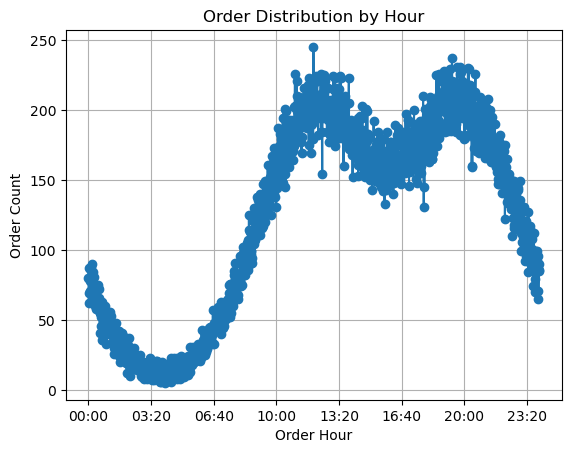

Best Hour for Advertising: 11:58


In [13]:
import matplotlib.pyplot as plt

# Group by hour and calculate the count of orders
order_counts = combined_df.groupby('Time').size()

# Plot the distribution of orders over different hours
order_counts.plot(kind='line', marker='o')
plt.xlabel('Order Hour')
plt.ylabel('Order Count')
plt.title('Order Distribution by Hour')
plt.grid(True)
plt.show()

# Find the hour with the highest order count
best_hour = order_counts.idxmax()

print("Best Hour for Advertising:", best_hour)


('iPhone', 'Lightning Charging Cable') 485
('Google Phone', 'USB-C Charging Cable') 476
('USB-C Charging Cable', 'Google Phone') 450
('Lightning Charging Cable', 'iPhone') 438
('Wired Headphones', 'iPhone') 233


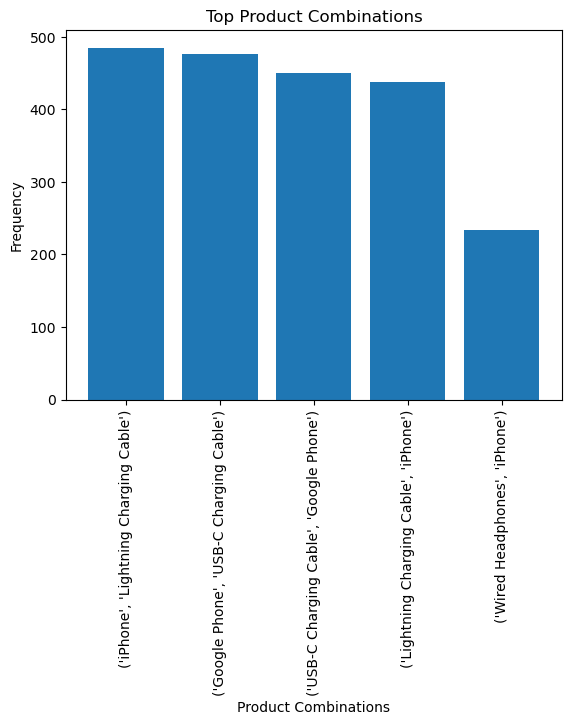

In [14]:
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Group the data by order ID and create a list of products in each order
order_products = combined_df.groupby('Order ID')['Product'].apply(list)

# Count the occurrences of product combinations
product_combinations = []
for products in order_products:
    product_combinations.extend(list(combinations(products, 2)))  # Change '2' to the desired combination size

# Calculate the frequency of product combinations
combination_counts = Counter(product_combinations)

# Get the most frequently occurring combinations
top_combinations = combination_counts.most_common(5)  # Change '5' to the desired number of top combinations

for combination, count in top_combinations:
    print(combination, count)
    
# Extract combination and count data for plotting
combinations, counts = zip(*top_combinations)

# Convert combinations to strings
combinations = [str(combination) for combination in combinations]

# Plot the data
plt.bar(combinations, counts)
plt.xlabel('Product Combinations')
plt.ylabel('Frequency')
plt.title('Top Product Combinations')
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [15]:
import pandas as pd

# Group the data by product name and calculate the sum of quantity ordered
product_sales = combined_df.groupby('Product')['Quantity Ordered'].sum()

# Find the product with the highest sales
best_selling_product = product_sales.idxmax()

# Get the sales volume of the best-selling product
sales_volume = product_sales.loc[best_selling_product]

print("Best-selling Product:", best_selling_product)
print("Sales Volume:", sales_volume)

# Analyze possible reasons for its high sales
# You can add your own analysis here based on the context of your data and business
print("\nPossible Reasons for High Sales:")
print("Product popularity, brand recognition,")
print("High-quality product or positive customer reviews,")
print("Strong customer demand or trendiness of the product")
# Some possible factors to consider:
# - Effective marketing and advertising campaigns
# - Competitive pricing or discounts



Best-selling Product: AAA Batteries (4-pack)
Sales Volume: 29711

Possible Reasons for High Sales:
Product popularity, brand recognition,
High-quality product or positive customer reviews,
Strong customer demand or trendiness of the product


In [16]:
# Count the occurrences of USB-C Charging Cable
usb_c_orders = combined_df[combined_df['Product'] == 'USB-C Charging Cable'].shape[0]

# Calculate the total number of orders
total_orders = combined_df.shape[0]

# Calculate the probability of ordering USB-C Charging Cable
usb_c_probability = ((usb_c_orders / total_orders)*100)

print("Probability of Ordering USB-C Charging Cable:", usb_c_probability,"%")


Probability of Ordering USB-C Charging Cable: 11.80609059978067 %


In [17]:
#How much probability for next people will ordered iPhone?

# Count the occurrences of iPhone
iPhone_orders = combined_df[combined_df['Product'] == 'iPhone'].shape[0]

# Calculate the total number of orders
total_orders = combined_df.shape[0]

# Calculate the probability of ordering iPhone
iPhone_probability = ((usb_c_orders / total_orders)*100)

print("Probability of Ordering iPhone:", iPhone_probability,"%")

Probability of Ordering iPhone: 11.80609059978067 %


In [18]:
#How much probability for next people will ordered Google Phone?

# Count the occurrences of Gopogle Phone
google_Phone_orders = combined_df[combined_df['Product'] == 'Google Phone'].shape[0]

# Calculate the total number of orders
total_orders = combined_df.shape[0]

# Calculate the probability of ordering iPhone
google_Phone_probability = ((google_Phone_orders / total_orders)*100)

print("Probability of Ordering iPhone:", google_Phone_probability,"%")


Probability of Ordering iPhone: 2.9789387846919553 %


In [19]:
#How much probability for next people will ordered Wired Headphones?

# Count the occurrences of Wired Headphones
Wired_Headphones_orders = combined_df[combined_df['Product'] == 'Wired Headphones'].shape[0]

# Calculate the total number of orders
total_orders = combined_df.shape[0]

# Calculate the probability of ordering iPhone
Wired_Headphones_probability = ((Wired_Headphones_orders / total_orders)*100)

print("Probability of Wired_Headphones_orders:",Wired_Headphones_probability,"%")

Probability of Wired_Headphones_orders: 10.148187723195456 %


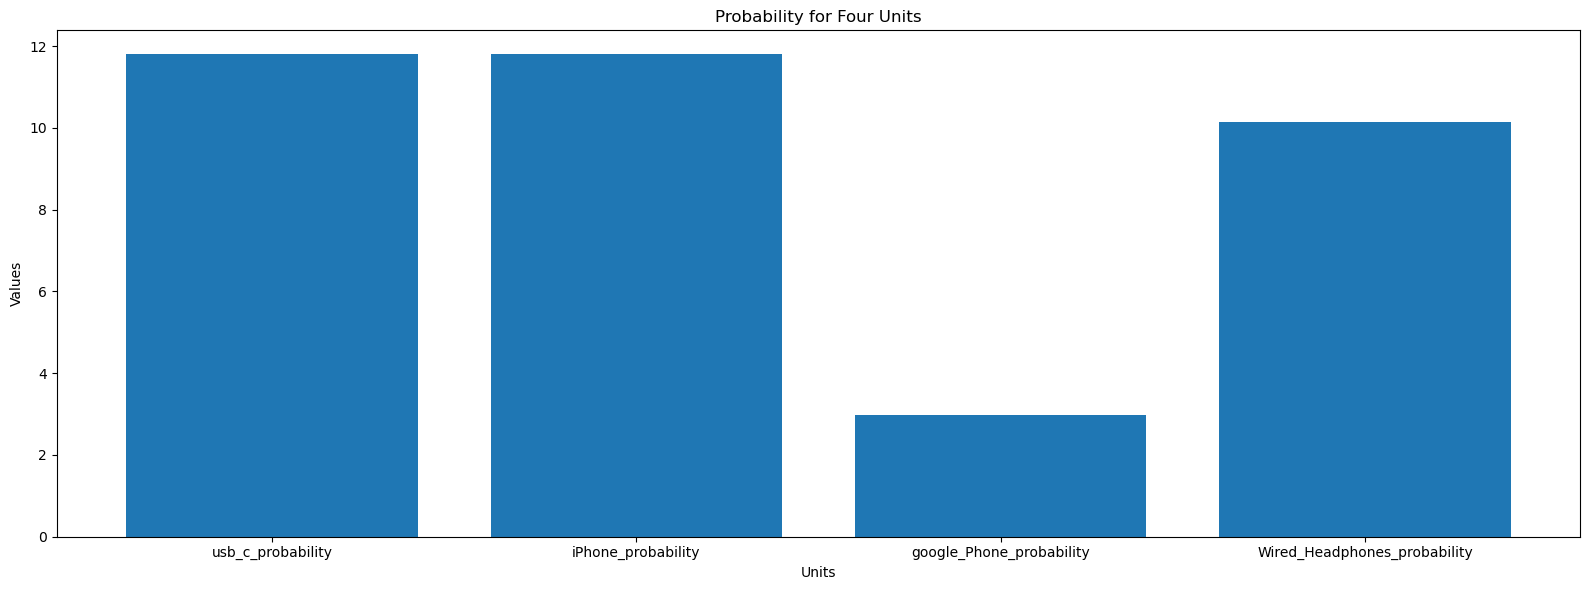

In [20]:
import matplotlib.pyplot as plt

# Data for the four units
units = ['usb_c_probability', 'iPhone_probability', 'google_Phone_probability', 'Wired_Headphones_probability']
values = [11.80, 11.80, 2.97, 10.14]

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(units, values)

# Add labels and title
ax.set_xlabel('Units')
ax.set_ylabel('Values')
ax.set_title('Probability for Four Units')

# Adjust spacing to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
